# Linear Regression (Implementing Gradient Descent)

### Importing the Libraries
1. Numpy
2. Matplotlib

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Loading the dataset
1. Training Features
2. Training Target Values

In [2]:
# Loading the dataset
x_train = np.array([1.0, 2.0])  # Features
y_train = np.array([300.0, 500.0])  # Target

Dataset:-

| Size (1000 sqft) | Price (1000s of dollors) |
| ---------------- | ------------------------ |
| 1                | 300                      |
| 2                | 500                      |

### Implementing the cost function
cost = 1/2m {summition i=0 to m-1 (f_wb - y[i])^2)}

In [3]:
def compute_cost(x, y, w, b):
    
    m = x.shape[0]
    cost = 0
    
    for i in range(m):
        f_wb = x[i] * w + b
        cost += (f_wb - y[i])**2
    cost = cost/2*m
    
    return cost

### Computing Gradient
computing partial derivation of cost function first with respect to w and then with respect to b indiviually

In [4]:
def compute_gradient(x, y, w, b):
    
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = x[i] * w + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db

Function that implements gradient descent

In [7]:
def gradient_descent(x, y, w_in, b_in, num_iters, alpha, cost_function, gradient_function):
    J_history = []
    p_history = []
    # Above is useful for plotting graph
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        j = cost_function(x, y, w, b)
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J_history.append(j)
        p_history.append([w, b])
        
        if i%math.ceil(num_iters/10) == 0:  # Printing cost at itervals 10 times or every iteration if number of iterations < 10
            print(f"Iteration {i:4}: Cost {j:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
        
        
    return w, b, J_history, p_history
        
        

In [8]:
w_init = 0
b_init = 0
alpha = 0.01  # 1.0e-2
iterations = 10000
w_final, b_final, J_history, p_history = gradient_descent(x_train, y_train, w_init, b_init, iterations, alpha, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 3.40e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 1.37e+01  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 3.18e+00  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 7.38e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 1.71e-01  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 3.98e-02  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 9.26e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 2.15e-03  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 5.00e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 1.16e-04  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


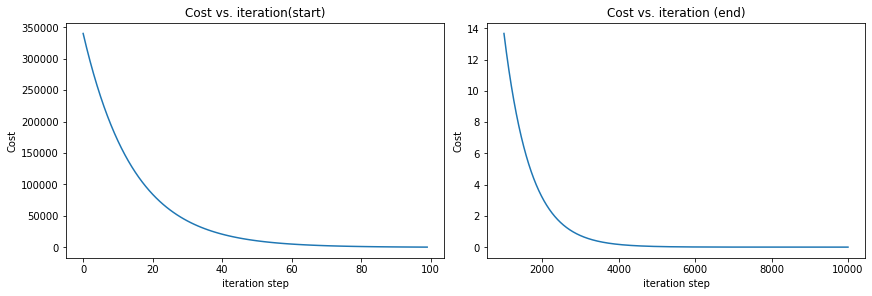

In [12]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history[:100])
ax2.plot(1000 + np.arange(len(J_history[1000:])), J_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [13]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


In [19]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, iterations, alpha, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 3.40e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 1.03e+06  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 3.13e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 9.49e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.88e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 8.73e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.65e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 8.03e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 2.44e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 7.39e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04
